These steps provide a systematic approach to exploring and analyzing the given data for transactions from 20 individuals from a bank, creating insights through visualization, engineering a new feature, and building a machine learning model to classify transaction types. The interpretation of the results from the model evaluation would guide further improvements or adjustments to the analysis and modeling process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [2]:
data = pd.read_csv("bank_data.csv")
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,417831169,4166.0,2870.0,NaN,Pets at Home
1,01/01/2023,00:00,417831169,1866.0,-2300.0,684967752.0,NaN
2,01/01/2023,00:00,684967752,3296.0,2300.0,417831169.0,NaN
3,01/01/2023,00:00,619428091,2980.0,1596.0,NaN,Happy Days Home
4,01/01/2023,00:00,658100753,3904.0,2870.0,NaN,Pets Corner


In [3]:
# Get info about the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2243 non-null   object 
 1   Timestamp               2243 non-null   object 
 2   Account No              2243 non-null   int64  
 3   Balance                 2243 non-null   float64
 4   Amount                  2243 non-null   float64
 5   Third Party Account No  77 non-null     float64
 6   Third Party Name        2166 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 122.8+ KB
None


In [4]:
# Descriptive statistics of numerical columns
print(data.describe())

         Account No       Balance       Amount  Third Party Account No
count  2.243000e+03   2243.000000  2243.000000            7.700000e+01
mean   5.233300e+08   2519.492035    -1.790584            4.697448e+08
std    2.594149e+08   3656.617358   530.934564            2.437500e+08
min    1.570340e+08  -4777.511322 -2510.000000            1.570340e+08
25%    2.660569e+08    420.494616   -86.425000            2.139046e+08
50%    6.183637e+08   1930.817987   -26.840000            4.178312e+08
75%    6.849678e+08   3500.387832   -11.430000            6.581008e+08
max    9.383028e+08  19436.468570  5292.800000            9.454158e+08


In [5]:
# Convert the "Date" column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

Count: This shows the number of non-missing values for each column. For example, there are 2243 non-missing values in the 'Account No', 'Balance', and 'Amount' columns, while the 'Third Party Account No' column has only 77 non-missing values.

Mean: The mean (average) value of each column is given. For instance, the mean balance is approximately 2519.49, and the mean amount is approximately -1.79. The negative mean amount suggests that on average, the transactions are more often debit (negative) transactions.

Standard Deviation (std): This measures the spread or dispersion of the values around the mean. A larger standard deviation indicates greater variability in the data. For example, the balance has a higher standard deviation (3656.62), indicating a wider range of balances.

Min and Max: These represent the minimum and maximum values in each column. The minimum balance is approximately -4777.51, which suggests a negative balance, while the maximum balance is 19436.47. The minimum and maximum amounts are -2510 and 5292.8, respectively.

25th Percentile (25%): This value indicates the point below which 25% of the data falls. For example, 25% of balances are below 420.49, and 25% of amounts are below -86.43.

Median (50%): The median is the middle value in a sorted dataset. It's also known as the 50th percentile. For example, the median balance is approximately 1930.82, and the median amount is approximately -26.84.

75th Percentile (75%): This value indicates the point below which 75% of the data falls. For instance, 75% of balances are below 3500.39, and 75% of amounts are below -11.43.

In [6]:
# Check for missing values
print(data.isnull().sum())

Date                         0
Timestamp                    0
Account No                   0
Balance                      0
Amount                       0
Third Party Account No    2166
Third Party Name            77
dtype: int64


The 'Third Party Account No' column has 2166 missing values.

The 'Third Party Name' column has 77 missing values.

Fill Missing Values:
For the 'Third Party Account No' and 'Third Party Name' columns, you could consider filling missing values with a placeholder, such as "Unknown" to indicate that the information is missing.

In [7]:
# Fill missing values with "Unknown" for 'Third Party Name' and 'Third Party Account No'
data['Third Party Name'].fillna('Unknown', inplace=True)
data['Third Party Account No'].fillna('Unknown', inplace=True)

In [8]:
data.head(15)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,2023-01-01,00:00,417831169,4166.0,2870.0,Unknown,Pets at Home
1,2023-01-01,00:00,417831169,1866.0,-2300.0,684967752.0,Unknown
2,2023-01-01,00:00,684967752,3296.0,2300.0,417831169.0,Unknown
3,2023-01-01,00:00,619428091,2980.0,1596.0,Unknown,Happy Days Home
4,2023-01-01,00:00,658100753,3904.0,2870.0,Unknown,Pets Corner
5,2023-01-01,00:00,266056908,3244.0,1712.0,Unknown,Kew House
6,2023-01-01,00:00,313806474,5065.0,3687.0,Unknown,Halifax
7,2023-01-01,00:00,313806474,4165.0,-900.0,213904562.0,Unknown
8,2023-01-01,00:00,213904562,2876.0,900.0,313806474.0,Unknown
9,2023-01-01,00:00,618363727,4149.0,2490.0,Unknown,Amazon


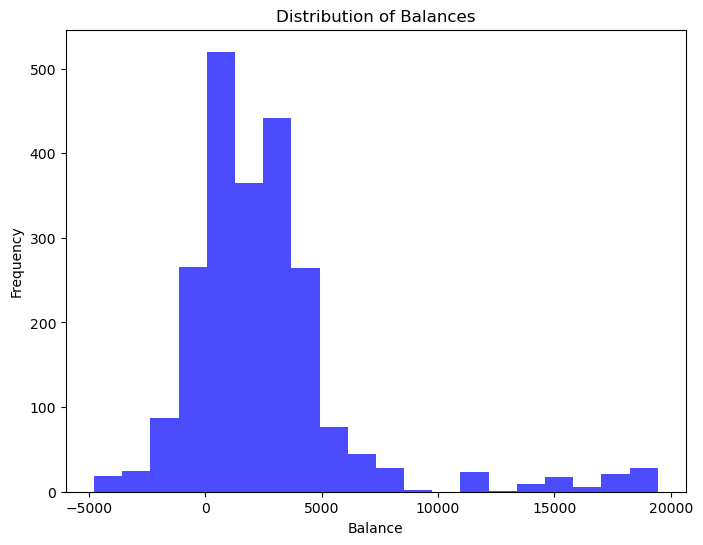

In [9]:
# Plot distribution of balances
plt.figure(figsize=(8, 6))
plt.hist(data['Balance'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balances')
plt.show()

A histogram is plotted to visualize the distribution of 'Balance' values, which helps us understand the range and frequency of balances.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


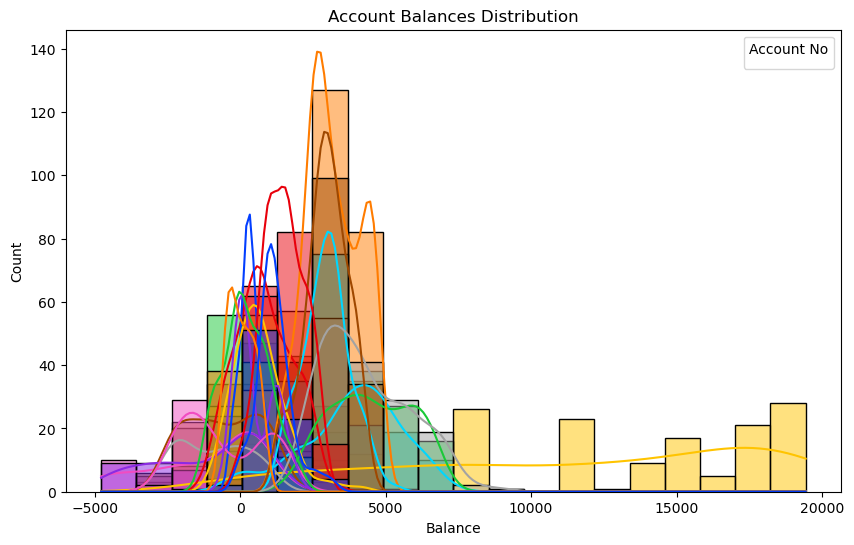

In [10]:
# Account Balances Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Balance', hue='Account No', kde=True, bins=20, palette='bright')
plt.xlabel('Balance')
plt.title('Account Balances Distribution')
plt.legend(title='Account No', loc='upper right')
plt.show()

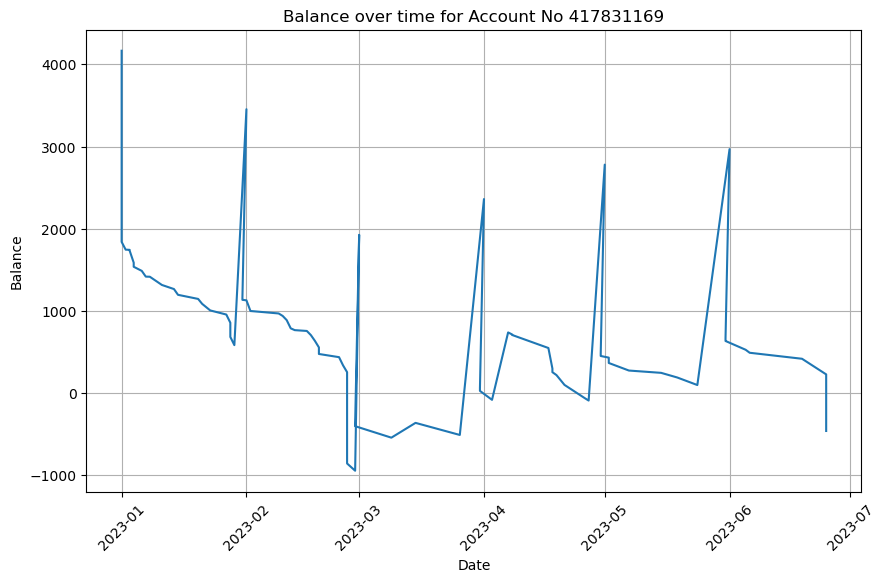

In [11]:
# Plot 1: Balance over time for Account No 417831169
account_no = 417831169
account_data = data[data['Account No'] == account_no]
plt.figure(figsize=(10, 6))
plt.plot(account_data['Date'], account_data['Balance'])
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title(f'Balance over time for Account No {account_no}')
plt.xticks(rotation=45)
plt.grid()
plt.show()

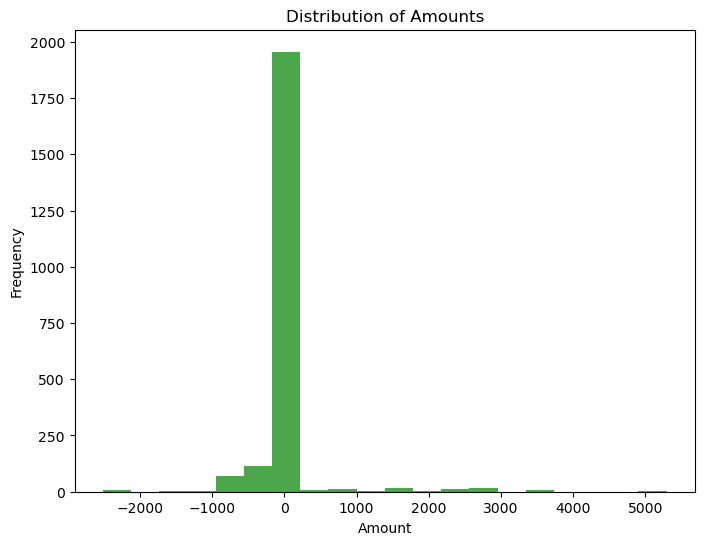

In [12]:
# Plot distribution of amounts
plt.figure(figsize=(8, 6))
plt.hist(data['Amount'], bins=20, color='green', alpha=0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amounts')
plt.show()

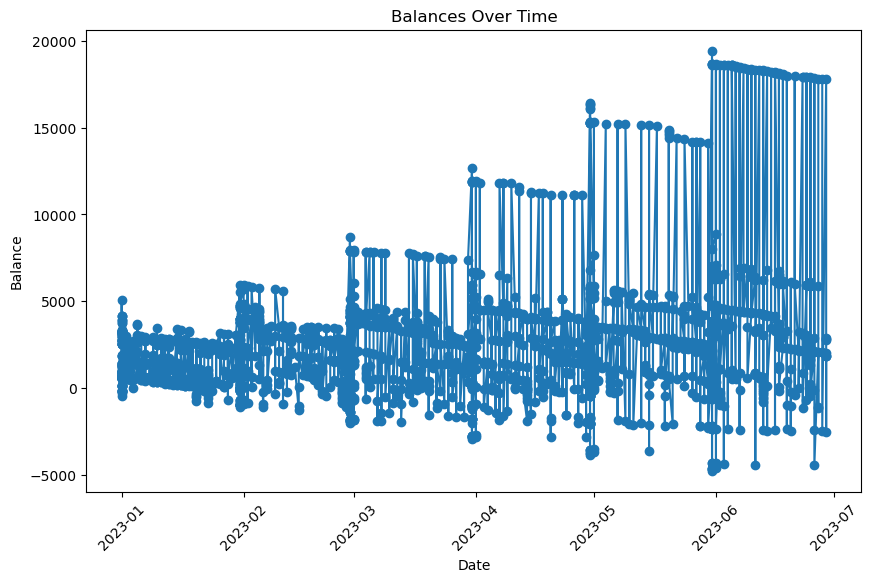

In [13]:
# Plot balances over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Balance'], marker='o')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title('Balances Over Time')
plt.xticks(rotation=45)
plt.show()

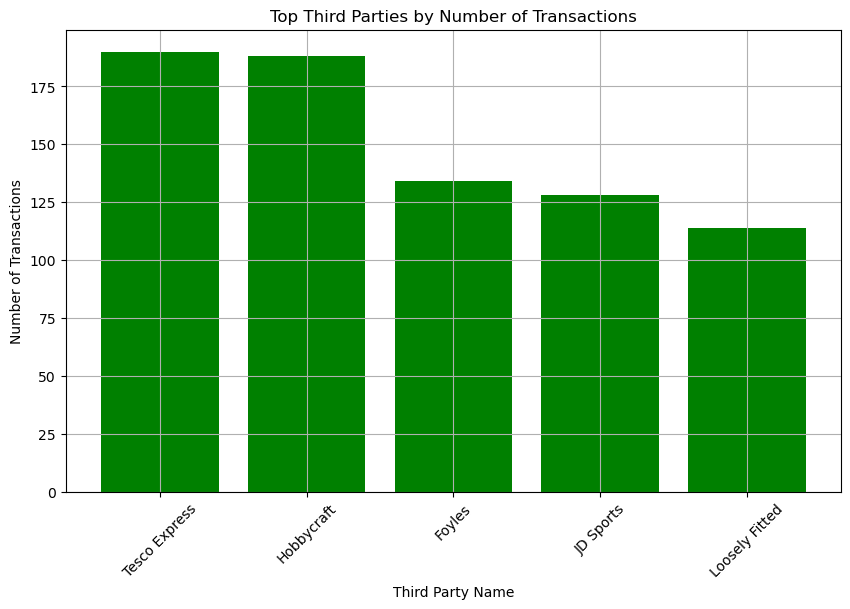

In [14]:
# Plot 3: Top third parties by the number of transactions
top_third_parties = data['Third Party Name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_third_parties.index, top_third_parties.values, color='green')
plt.xlabel('Third Party Name')
plt.ylabel('Number of Transactions')
plt.title('Top Third Parties by Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

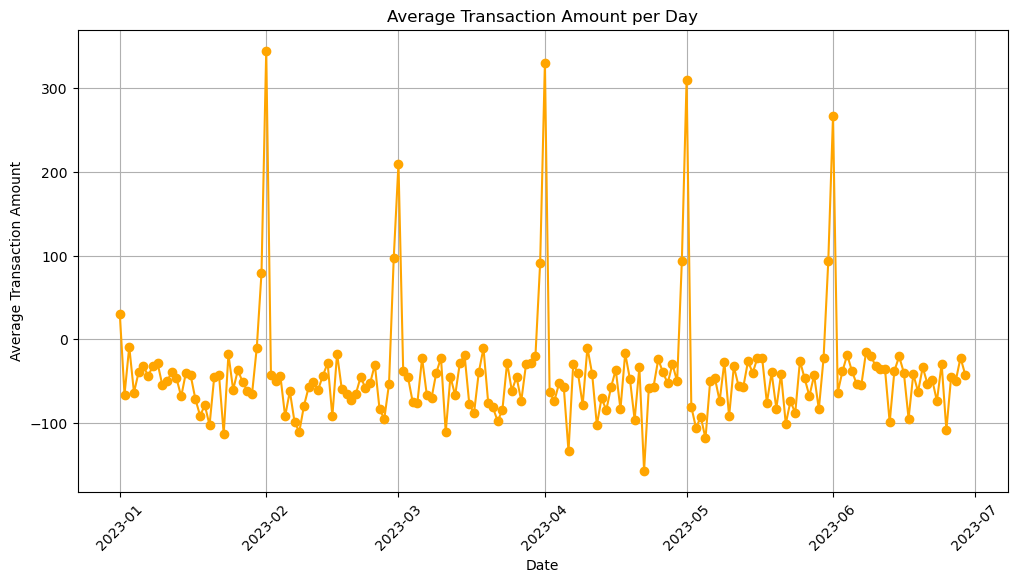

In [15]:
# Plot 4: Average transaction amount per day
daily_avg_amount = data.groupby('Date')['Amount'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_amount.index, daily_avg_amount.values, marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount per Day')
plt.xticks(rotation=45)
plt.grid()
plt.show()

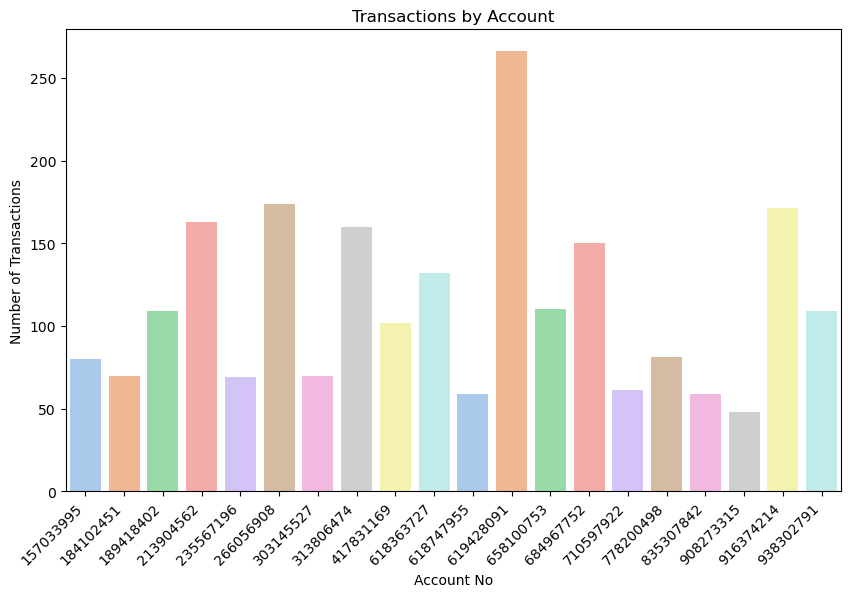

In [16]:
# Transactions by Account
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Account No', palette='pastel')
plt.xlabel('Account No')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Account')
plt.xticks(rotation=45, ha='right')
plt.show()

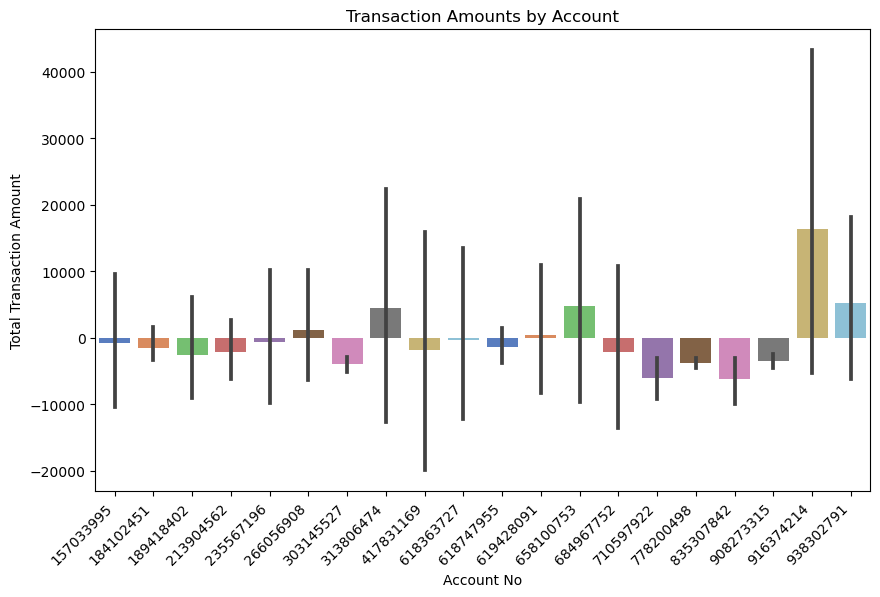

In [17]:
# Transaction Amounts by Account
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Account No', y='Amount', palette='muted', estimator=sum)
plt.xlabel('Account No')
plt.ylabel('Total Transaction Amount')
plt.title('Transaction Amounts by Account')
plt.xticks(rotation=45, ha='right')
plt.show()


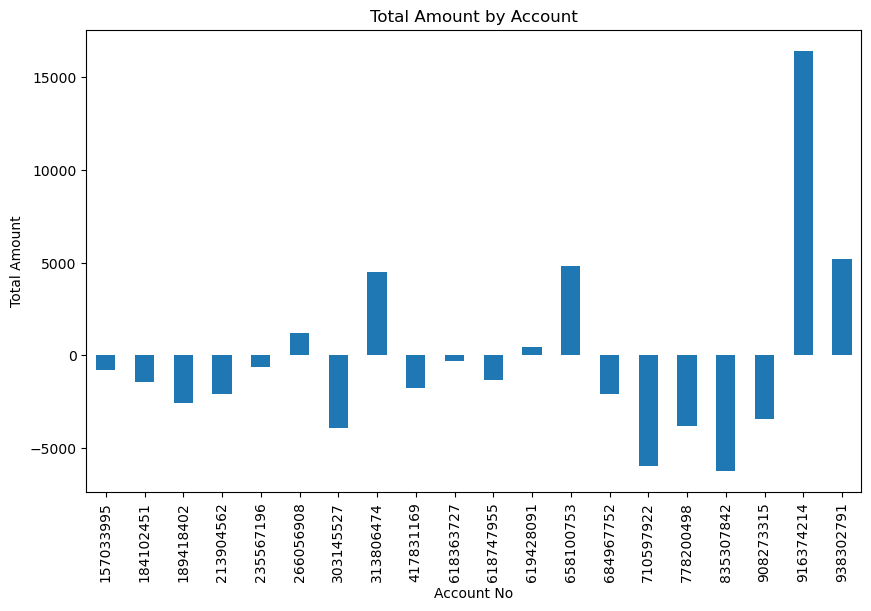

In [18]:
total_amount_by_account = data.groupby('Account No')['Amount'].sum()

plt.figure(figsize=(10, 6))
total_amount_by_account.plot(kind='bar')
plt.xlabel('Account No')
plt.ylabel('Total Amount')
plt.title('Total Amount by Account')
plt.show()

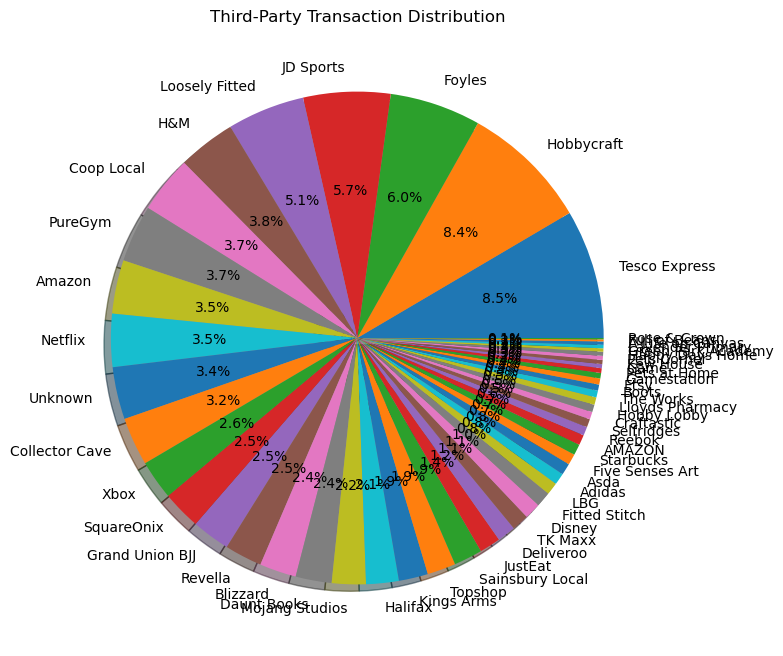

In [19]:
third_party_counts = data['Third Party Name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(third_party_counts, labels=third_party_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Third-Party Transaction Distribution')
plt.show()

We create a new feature called 'Transaction Type' based on the sign of the 'Amount' column. Transactions with positive amounts are labeled as 'credit', and transactions with negative amounts are labeled as 'debit'. This allows us to distinguish between different types of transactions.

In [20]:
# Feature Engineering (Creating a 'Transaction Type' feature)

data['Transaction Type'] = data['Amount'].apply(lambda x: 'credit' if x >= 0 else 'debit')


We group transactions by 'Transaction Type' ('credit' or 'debit') and calculate the average 'Balance' and 'Amount' for each group. This provides insights into the average balance and amount for different transaction types.

In [21]:
# Group transactions by 'Transaction Type' and calculate average balance and amount
transaction_summary = data.groupby('Transaction Type').agg({'Balance': 'mean', 'Amount': 'mean'})

print(transaction_summary)


                      Balance       Amount
Transaction Type                          
credit            3632.876445  2088.081111
debit             2472.950188   -89.151686


In [22]:
# Import required libraries for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [23]:
X = data[['Balance', 'Amount']]  # Features
y = data['Amount'].apply(lambda x: 'credit' if x >= 0 else 'debit')  # Target variable

In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      credit       1.00      0.96      0.98        23
       debit       1.00      1.00      1.00       426

    accuracy                           1.00       449
   macro avg       1.00      0.98      0.99       449
weighted avg       1.00      1.00      1.00       449



Precision: Precision measures the percentage of correctly predicted positive instances (in this case, 'credit' transactions) among all instances predicted as positive. A precision of 1.00 for 'credit' means that all instances predicted as 'credit' were indeed correct.

Recall: Recall, also known as sensitivity or true positive rate, measures the percentage of actual positive instances that were correctly predicted. For 'credit', the recall is 0.96, indicating that 96% of actual 'credit' transactions were predicted correctly.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, particularly useful when dealing with imbalanced classes. The F1-score for 'credit' is 0.98, showing a good balance between precision and recall.

Support: Support represents the number of instances in each class.

Accuracy: Accuracy is the proportion of correctly predicted instances over the total number of instances. The overall accuracy is 1.00, indicating that the model is predicting correctly for most instances.

Macro Avg: The macro average takes the average of precision, recall, and F1-score for both classes. It gives equal weight to both classes. In your case, the macro average F1-score is 0.99.

Weighted Avg: The weighted average considers the support of each class, giving more weight to the class with more instances. It provides a more realistic assessment when dealing with imbalanced classes. The weighted average F1-score is 1.00.

In summary, the model is performing exceptionally well with high precision, recall, and F1-score for both 'credit' and 'debit' classes. The accuracy and F1-scores suggest that the model is able to accurately predict both classes. However, given the high performance metrics, it's a good idea to double-check the data and the evaluation process to ensure that there are no data leakage or evaluation biases.

In [28]:
# Feature Importance Visualization
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)


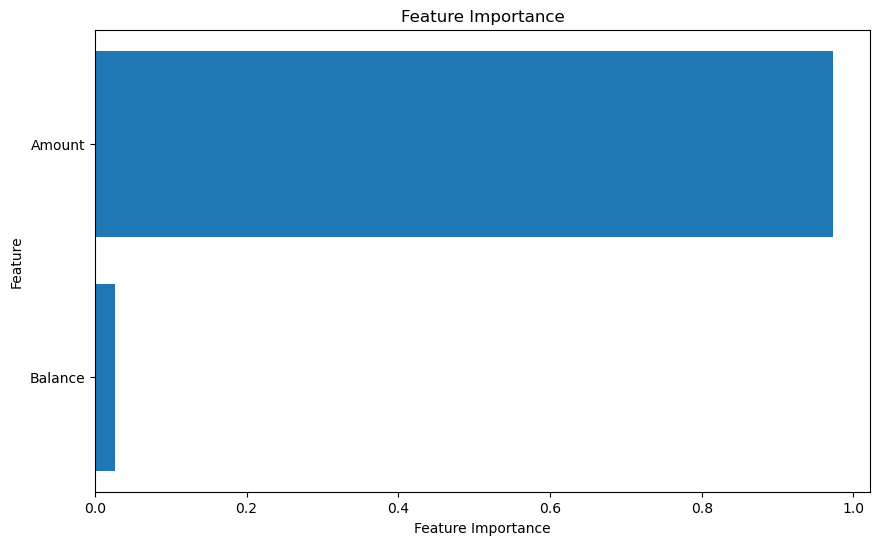

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

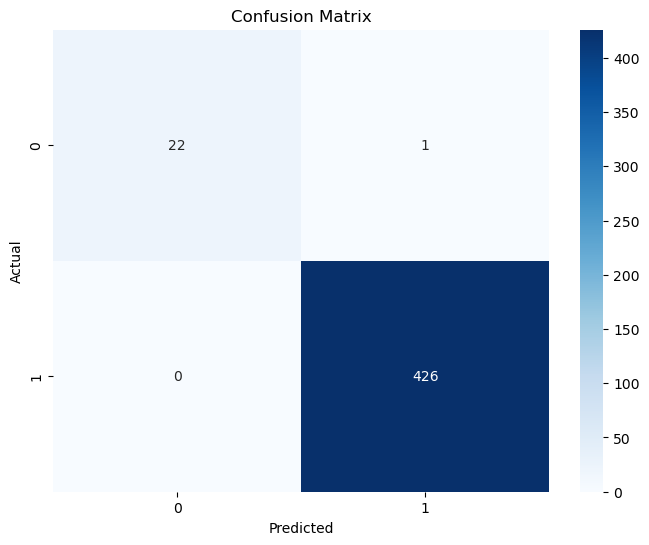

In [30]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(cm)

[[ 22   1]
 [  0 426]]


True Positive (TP): 426
This indicates that the model correctly predicted 426 instances as 'debit' transactions when they were actually 'debit'.

False Positive (FP): 1
This indicates that the model incorrectly predicted 1 instance as a 'debit' transaction when it was actually 'credit'.

True Negative (TN): 22
This indicates that the model correctly predicted 22 instances as 'credit' transactions when they were actually 'credit'.

False Negative (FN): 0
This indicates that the model incorrectly predicted 0 instances as 'credit' transactions when they were actually 'debit'.
In the context of your classification problem:

The 'credit' class has 22 true positives (correctly predicted 'credit') and 0 false negatives (no 'credit' transactions were incorrectly predicted as 'debit').

The 'debit' class has 426 true positives (correctly predicted 'debit') and 1 false positive (one 'credit' transaction was incorrectly predicted as 'debit').

The confusion matrix shows thatthe model is performing very well. The single false positive indicates that the model predicted one 'credit' transaction as 'debit' incorrectly. However, the true positives far outweigh this single false positive, which demonstrates the model's high accuracy in predicting both classes. Overall, your model's predictions align well with the actual classes.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import seaborn as sns

In [33]:
# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [34]:
# Predictions
y_pred = gb_model.predict(X_test)

In [35]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      credit       1.00      0.96      0.98        23
       debit       1.00      1.00      1.00       426

    accuracy                           1.00       449
   macro avg       1.00      0.98      0.99       449
weighted avg       1.00      1.00      1.00       449



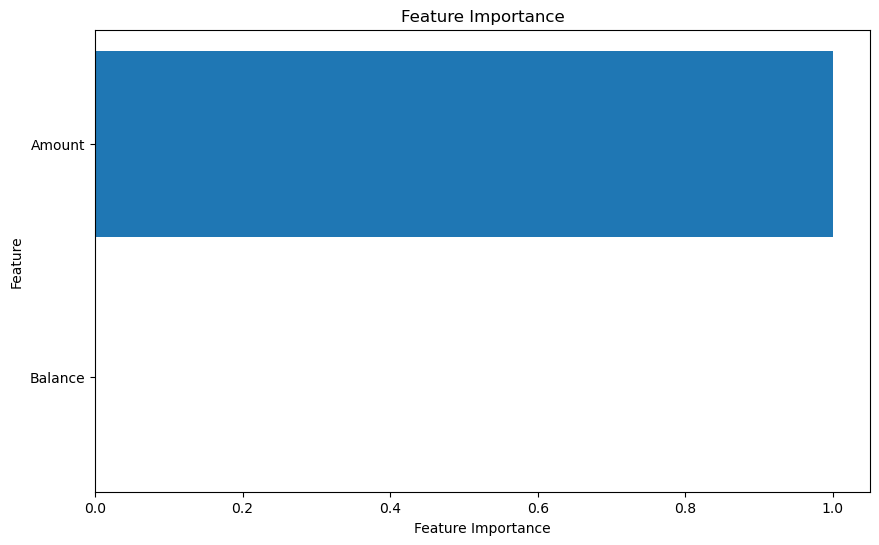

In [36]:
# Feature Importance Visualization
feature_importance = gb_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [37]:
# Convert labels to binary (0 for 'credit', 1 for 'debit')
y_test_binary = y_test.apply(lambda x: 0 if x == 'credit' else 1)
y_prob_binary = gb_model.predict_proba(X_test)[:, 1]

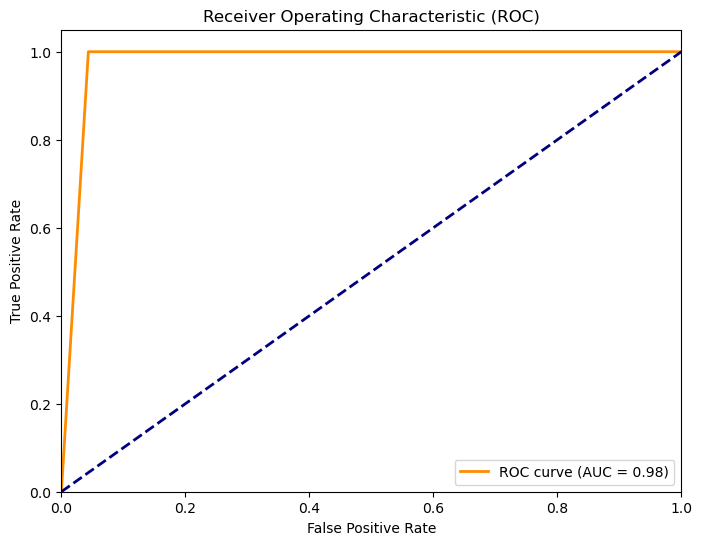

In [38]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Text Classification for Transaction Types



 Performing text classification on 'Third Party Name' to predict transaction types ('credit' or 'debit').

In [40]:
# Importing the relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [41]:
# Feature selection and splitting
X_text = data['Third Party Name']  # Text features
y_text = data['Amount'].apply(lambda x: 'credit' if x >= 0 else 'debit')  # Target variable


In [42]:
# Split into training and testing sets
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.2, random_state=42)


In [44]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_text_vec = vectorizer.fit_transform(X_train_text)
X_test_text_vec = vectorizer.transform(X_test_text)


In [45]:
# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_text_vec, y_train_text)


MultinomialNB()

In [47]:
# Predictions
y_pred_text = nb_model.predict(X_test_text_vec)

In [48]:
# Evaluate the model
print(classification_report(y_test_text, y_pred_text))

              precision    recall  f1-score   support

      credit       0.78      0.30      0.44        23
       debit       0.96      1.00      0.98       426

    accuracy                           0.96       449
   macro avg       0.87      0.65      0.71       449
weighted avg       0.95      0.96      0.95       449



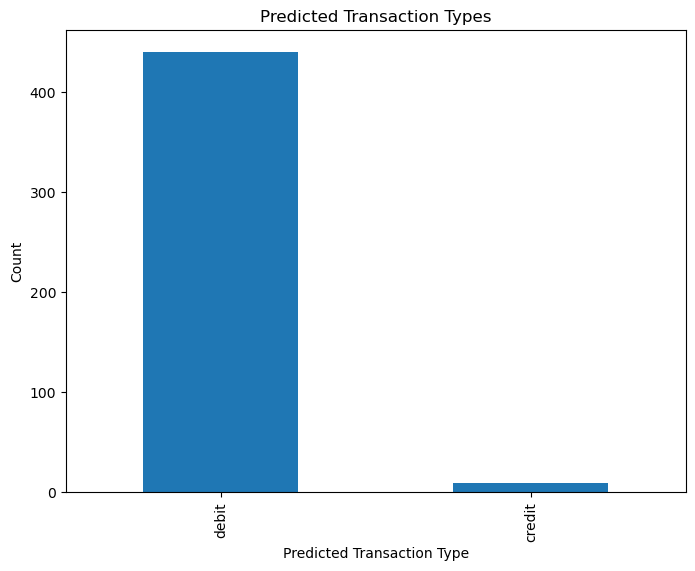

In [49]:
# Plot a bar chart of the predicted classes
plt.figure(figsize=(8, 6))
y_pred_text_series = pd.Series(y_pred_text)
y_pred_text_series.value_counts().plot(kind='bar')
plt.xlabel('Predicted Transaction Type')
plt.ylabel('Count')
plt.title('Predicted Transaction Types')
plt.show()

The classification report provides insights into the performance of the text classification model for predicting transaction types based on the 'Third Party Name'. 

Precision: Precision measures the percentage of correctly predicted positive instances (in this case, 'debit' transactions) among all instances predicted as positive. The precision for 'debit' is 0.96, which means that 96% of instances predicted as 'debit' were indeed correct.

Recall: Recall, also known as sensitivity or true positive rate, measures the percentage of actual positive instances that were correctly predicted. The recall for 'debit' is 1.00, indicating that all actual 'debit' transactions were correctly predicted.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics. The F1-score for 'debit' is 0.98, indicating a good balance between precision and recall.

Support: Support represents the number of instances in each class.

Accuracy: Accuracy is the proportion of correctly predicted instances over the total number of instances. The overall accuracy is 0.96, indicating that the model is making accurate predictions for most instances.

Macro Avg: The macro average takes the average of precision, recall, and F1-score for both classes. It gives equal weight to both classes. In your case, the macro average F1-score is 0.71.

Weighted Avg: The weighted average considers the support of each class, giving more weight to the class with more instances. The weighted average F1-score is 0.95.

Interpreting these metrics, the model is performing well in terms of precision, recall, and F1-score for the 'debit' class. However, it's not performing as well for the 'credit' class, as indicated by the lower precision, recall, and F1-score. This might suggest that the model struggles to accurately predict 'credit' transactions based on the 'Third Party Name'. Further analysis and potentially different features or models could be explored to improve the model's performance for both classes.